In [1]:
#workshop 2 on sentiments analysis 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
import seaborn as sns 

In [3]:
import re 
import nltk

In [4]:
df = pd.read_csv('Review_with_sentiment.csv')

In [5]:
df.shape

(22641, 11)

In [6]:
df.head(2)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   

  Class Name  Polarity  review_len  token_count  
0  Intimates  0.633333          53            8  
1    Dresses  0.339583         303           67

In [8]:
df.describe()

Age        Rating  Recommended IND  Positive Feedback Count  \
count  22641.000000  22641.000000     22641.000000             22641.000000   
mean      43.280376      4.183561         0.818868                 2.630582   
std       12.326980      1.115762         0.385136                 5.786164   
min       18.000000      1.000000         0.000000                 0.000000   
25%       34.000000      4.000000         1.000000                 0.000000   
50%       41.000000      5.000000         1.000000                 1.000000   
75%       52.000000      5.000000         1.000000                 3.000000   
max       99.000000      5.000000         1.000000               122.000000   

           Polarity    review_len   token_count  
count  22641.000000  22641.000000  22641.000000  
mean       0.249824    308.687911     60.214876  
std        0.176679    143.940048     28.503976  
min       -0.975000      9.000000      2.000000  
25%        0.140000    186.000000     36.000000  
50%        0.239399    301.000000     59.000000  
75%        0.350000    459.000000     88.000000  
max        1.000000    508.000000    115.000000

In [9]:
df.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Polarity', 'review_len', 'token_count'],
      dtype='object')

In [10]:
df['Review Text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [11]:
#before doing cleaning better to have some understanding of the data using seaborn 

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

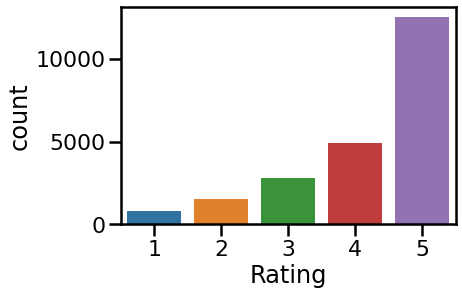

In [12]:
sns.set_context('poster')
sns.countplot('Rating',data = df)

In [13]:
round(df.groupby('Rating',)['Rating'].count()/df.shape[0] * 100 , 2 )

Rating
1     3.63
2     6.84
3    12.47
4    21.68
5    55.39
Name: Rating, dtype: float64

In [14]:
round(df.groupby('Recommended IND')['Recommended IND'].count()/df.shape[0] *100,2)

Recommended IND
0    18.11
1    81.89
Name: Recommended IND, dtype: float64

<Figure size 1152x576 with 0 Axes>

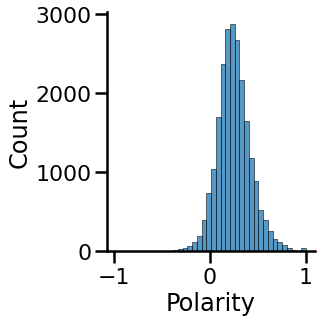

In [15]:
plt.figure(figsize=(16,8))
sns.displot(df['Polarity'],bins=40)

In [16]:
review_cat = pd.cut(x=df['Polarity'], bins=[-1,-0.3,0.6,1],
                    labels=['bad', 'neutral','good'
                            ])

In [24]:
review_cat,df['Polarity']

(0           good
 1        neutral
 2        neutral
 3        neutral
 4        neutral
           ...   
 22636    neutral
 22637    neutral
 22638    neutral
 22639    neutral
 22640    neutral
 Name: Polarity, Length: 22641, dtype: category
 Categories (3, object): ['bad' < 'neutral' < 'good'],
 0        0.633333
 1        0.339583
 2        0.073675
 3        0.550000
 4        0.512891
            ...   
 22636    0.552667
 22637    0.091667
 22638    0.414286
 22639    0.322222
 22640    0.413889
 Name: Polarity, Length: 22641, dtype: float64)

In [17]:
review_cat.value_counts()

neutral    21838
good         743
bad           60
Name: Polarity, dtype: int64

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

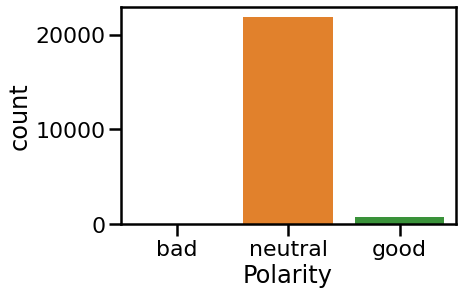

In [18]:
sns.countplot(review_cat)
plt.tight_layout

In [19]:
clean_dataset =pd.DataFrame()

In [20]:
no_url=[]
for i, word in enumerate(df['Review Text']):
    no_url.append( re.sub('http://\S+|https://\S+', '', word))

In [21]:
clean_dataset['text_noURL']=pd.DataFrame(no_url)

In [22]:
clean_dataset

text_noURL
0      Absolutely wonderful - silky and sexy and comf...
1      Love this dress!  it's sooo pretty.  i happene...
2      I had such high hopes for this dress and reall...
3      I love, love, love this jumpsuit. it's fun, fl...
4      This shirt is very flattering to all due to th...
...                                                  ...
22636  I was very happy to snag this dress at such a ...
22637  It reminds me of maternity clothes. soft, stre...
22638  This fit well, but the top was very see throug...
22639  I bought this dress for a wedding i have this ...
22640  This dress in a lovely platinum is feminine an...

[22641 rows x 1 columns]

In [23]:
text_punc=[]
for i,word in enumerate(clean_dataset['text_noURL']):
    no_punc= re.sub(r'[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]', "", word)
    text_punc.append(no_punc)
    print(no_punc)

Absolutely wonderful  silky and sexy and comfortable
Love this dress  it's sooo pretty  i happened to find it in a store and i'm glad i did bc i never would have ordered it online bc it's petite  i bought a petite and am 5'8  i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite
I had such high hopes for this dress and really wanted it to work for me i initially ordered the petite small my usual size but i found this to be outrageously small so small in fact that i could not zip it up i reordered it in petite medium which was just ok overall the top half was comfortable and fit nicely but the bottom half had a very tight under layer and several somewhat cheap net over layers imo a major design flaw was the net over layer sewn directly into the zipper  it c
I love love love this jumpsuit it's fun flirty and fabulous every time i wear it i get nothing but great compliments
This shirt is very flattering to all due to the 

The flow and feel of the material is really nice however i think it runs large i ordered a small and i have exchanged it for an xs which i am hoping fits a bit better i wanted the pants to be a bit more fitted around the hips and flow from there
This cute dress is swingy and chock full of fun little details  love the embroidery colors crochet lace tassels wide sleeves  don't like that it's all polyester and some embroidery is unraveling so i don't know what to do about that  size down if your petite or slender  i'm a medlarge 135 36c 382735 and medium fit great at the bodiceshoulders  hem hits my knees in regular size
I can't get enough of maxi dresses and i can't resist tracy reese this stunning dress caught my eye immediately but i was worried that the back cut out at the waist would make my backside look flatter i'm so glad i took the plunge to buy before it sold out this dress fits perfectly it's flattering to my figure the print is beautiful the fabric and drape do not cling to my

Beautiful crepey fabric lovely color i was surprised to see gold threading in the peach option i'm not a big gold thread fan but it's doable the ruching across the back makes the fit very loose and blousy this is not a figuredefining piece but it's comfortable will probably be more so after a wash to get that stiffy factory fabric finish feeling out and versatile
Love love this dress the fit is perfect the cut is feminine and flirty but not too showy and bare there is the perfect amount of swing and it's a great length i can't say enough about it i think it's worth the price which i have to admit i was hesitant about so comfortable and versatile i see it being worn quite often
keep dresses like this coming
btw the neck line is flattering on every body type
for reference i'm 5'3 and weigh 110 lbs and i purchased a size 2 but i think a
Someone recommended to size up if u have large breast and i am glad i did it fits like a dream this is the cutest dot dress i have ever tried
I literally 

My normal size m fit well but i wouldn't want it to shrink any hangs well
I absolutely love this top i bought it in white and ended up buying it in the lavender as well the top is very flattering and works with any occasion the fabric is a little thin but its fine with a nude bra i have worn the top to work and out at night and i always get lots of compliments
I am really happy with these jeans fun fit high waisted great detail and have just the right amount of stretch i have worn them 4 times and haven't washed them yet i find this helps shape my new jeans and they still fit like a comfortable glove a different twist on the ripped up jeans because of the color love them i normally fit a 29 ordered 28 in these and they are perfect
When you look at the online pictures of the navy colored dress the stripes are diagonal however that is not the case with the dress in person the stripes are all horizontal and not that flattering such a bummer because i love maeve dresses and thought this wo

I have a few evening functions this month and the next few months and i thought this dress would be different and fun i really wanted to like it but i could not there were spots missing sequence some fell off as i tried the dress on and i did try it on twice each time there were some on the floor they are sewed on so poorly for the price of this dress i fear it would be a dress for one season and i'd have to throw it out not for that price so back it goes
Love this sweater it is so cozy i gave it a four because it does shed a lot i have not washed yet but hopefully that will help with the shedding i am hoping to buy other colors
I bought this sweater in the sky color just love it i'll go back for the rust colored one
Beautiful skirt with a fun graphic pattern and embroidered texture i tried on my usual xs as well as a s to compare they both fit but i decided to keep the xs since the skirt has a little bit of a stretch thanks to a hidden elastic panel in the back plus it looks best at y

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
clean_dataset = pd.DataFrame(text_punc).rename(columns={0:'text_nopunc'})

In [25]:
clean_dataset

text_nopunc
0      Absolutely wonderful  silky and sexy and comfo...
1      Love this dress  it's sooo pretty  i happened ...
2      I had such high hopes for this dress and reall...
3      I love love love this jumpsuit it's fun flirty...
4      This shirt is very flattering to all due to th...
...                                                  ...
22636  I was very happy to snag this dress at such a ...
22637  It reminds me of maternity clothes soft stretc...
22638  This fit well but the top was very see through...
22639  I bought this dress for a wedding i have this ...
22640  This dress in a lovely platinum is feminine an...

[22641 rows x 1 columns]

In [26]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
newStopWords = ['i','you']
stop_new = stop.append(newStopWords)

In [27]:
# removal of stop words 
clean_dataset['no_stopwords'] = clean_dataset['text_nopunc'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [28]:
clean_dataset

text_nopunc  \
0      Absolutely wonderful  silky and sexy and comfo...   
1      Love this dress  it's sooo pretty  i happened ...   
2      I had such high hopes for this dress and reall...   
3      I love love love this jumpsuit it's fun flirty...   
4      This shirt is very flattering to all due to th...   
...                                                  ...   
22636  I was very happy to snag this dress at such a ...   
22637  It reminds me of maternity clothes soft stretc...   
22638  This fit well but the top was very see through...   
22639  I bought this dress for a wedding i have this ...   
22640  This dress in a lovely platinum is feminine an...   

                                            no_stopwords  
0            absolutely wonderful silky sexy comfortable  
1      love dress sooo pretty happened find store i'm...  
2      i high hopes dress really wanted work initiall...  
3      i love love love jumpsuit fun flirty fabulous ...  
4      this shirt flattering due adjustable front tie...  
...                                                  ...  
22636  i happy snag dress great price easy slip flatt...  
22637  it reminds maternity clothes soft stretchy shi...  
22638  this fit well top see never would worked i'm g...  
22639  i bought dress wedding summer cute unfortunate...  
22640  this dress lovely platinum feminine fits perfe...  

[22641 rows x 2 columns]

In [29]:
import emoji

In [30]:
emoji_count= []
text_noEmoji=[]
for i, word in enumerate(clean_dataset['no_stopwords']):
    emoji_count.append(emoji.emoji_count(word))
    text_noEmoji.append(emoji.replace_emoji(word,""))

In [31]:
clean_dataset['Emoji_count']=pd.DataFrame(emoji_count)

In [32]:
clean_dataset['text_noEmoji']=pd.DataFrame(text_noEmoji)

In [33]:
clean_dataset

text_nopunc  \
0      Absolutely wonderful  silky and sexy and comfo...   
1      Love this dress  it's sooo pretty  i happened ...   
2      I had such high hopes for this dress and reall...   
3      I love love love this jumpsuit it's fun flirty...   
4      This shirt is very flattering to all due to th...   
...                                                  ...   
22636  I was very happy to snag this dress at such a ...   
22637  It reminds me of maternity clothes soft stretc...   
22638  This fit well but the top was very see through...   
22639  I bought this dress for a wedding i have this ...   
22640  This dress in a lovely platinum is feminine an...   

                                            no_stopwords  Emoji_count  \
0            absolutely wonderful silky sexy comfortable            0   
1      love dress sooo pretty happened find store i'm...            0   
2      i high hopes dress really wanted work initiall...            0   
3      i love love love jumpsuit fun flirty fabulous ...            0   
4      this shirt flattering due adjustable front tie...            0   
...                                                  ...          ...   
22636  i happy snag dress great price easy slip flatt...            0   
22637  it reminds maternity clothes soft stretchy shi...            0   
22638  this fit well top see never would worked i'm g...            0   
22639  i bought dress wedding summer cute unfortunate...            0   
22640  this dress lovely platinum feminine fits perfe...            0   

                                            text_noEmoji  
0            absolutely wonderful silky sexy comfortable  
1      love dress sooo pretty happened find store i'm...  
2      i high hopes dress really wanted work initiall...  
3      i love love love jumpsuit fun flirty fabulous ...  
4      this shirt flattering due adjustable front tie...  
...                                                  ...  
22636  i happy snag dress great price easy slip flatt...  
22637  it reminds maternity clothes soft stretchy shi...  
22638  this fit well top see never would worked i'm g...  
22639  i bought dress wedding summer cute unfortunate...  
22640  this dress lovely platinum feminine fits perfe...  

[22641 rows x 4 columns]

In [34]:
# # Download Wordnet through NLTK in python console:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
tokens=[]
lemmitization_output=[]
lemmatizer =WordNetLemmatizer()
for i,word in enumerate(clean_dataset['text_noEmoji']):
    tokens_words = nltk.word_tokenize(word)
    tokens.append(tokens_words)
    lemmatized_out = ' '.join([lemmatizer.lemmatize(w) for w in tokens_words])
    lemmitization_output.append(lemmatized_out)

In [36]:
lemmitization_output[1]

"love dress sooo pretty happened find store i 'm glad bc never would ordered online bc petite bought petite 5 ' 8 love length hit little knee would definitely true midi someone truly petite"

In [43]:
clean_dataset['Lemmitizes_output']=pd.DataFrame(lemmitization_output)

In [44]:
clean_dataset.head(2)

text_nopunc  \
0  Absolutely wonderful  silky and sexy and comfo...   
1  Love this dress  it's sooo pretty  i happened ...   

                                        no_stopwords  Emoji_count  \
0        absolutely wonderful silky sexy comfortable            0   
1  love dress sooo pretty happened find store i'm...            0   

                                        text_noEmoji  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store i'm...   

                                   Lemmitizes_output review_polarity  
0        absolutely wonderful silky sexy comfortable            good  
1  love dress sooo pretty happened find store i '...         neutral

In [45]:
clean_dataset['review_polarity']=pd.DataFrame(review_cat)

In [46]:
clean_dataset.head(2)

text_nopunc  \
0  Absolutely wonderful  silky and sexy and comfo...   
1  Love this dress  it's sooo pretty  i happened ...   

                                        no_stopwords  Emoji_count  \
0        absolutely wonderful silky sexy comfortable            0   
1  love dress sooo pretty happened find store i'm...            0   

                                        text_noEmoji  \
0        absolutely wonderful silky sexy comfortable   
1  love dress sooo pretty happened find store i'm...   

                                   Lemmitizes_output review_polarity  
0        absolutely wonderful silky sexy comfortable            good  
1  love dress sooo pretty happened find store i '...         neutral

In [47]:
clean_dataset.review_polarity.unique()

array(['good', 'neutral', 'bad'], dtype=object)

In [48]:
clean_dataset.groupby('review_polarity')['review_polarity'].count()

review_polarity
bad           60
good         743
neutral    21838
Name: review_polarity, dtype: int64

In [49]:
good_phrases = clean_dataset[ clean_dataset.review_polarity =='good']
good_phrases.head(3)

text_nopunc  \
0   Absolutely wonderful  silky and sexy and comfo...   
47  Very comfortable material is good cut out on s...   
64  Loved this top and was really happy to find it...   

                                         no_stopwords  Emoji_count  \
0         absolutely wonderful silky sexy comfortable            0   
47  very comfortable material good cut sleeves fla...            0   
64                   loved top really happy find sale            0   

                                         text_noEmoji  \
0         absolutely wonderful silky sexy comfortable   
47  very comfortable material good cut sleeves fla...   
64                   loved top really happy find sale   

                                    Lemmitizes_output review_polarity  
0         absolutely wonderful silky sexy comfortable            good  
47  very comfortable material good cut sleeve flat...            good  
64                   loved top really happy find sale            good

In [50]:
good_words = []
for t in good_phrases.Lemmitizes_output:  # Go to the "text" column of "neg_phrases" dataframe
    good_words.append(t)

In [51]:
good_text = pd.Series(good_words).str.cat(sep = ' ')

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [53]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
good_stop_words = ["beautiful","perfect","comfortable","great","love","nice"] + list(STOPWORDS)

In [54]:
good_wordcloud = WordCloud(stopwords=good_stop_words, width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(good_text)

(-0.5, 1599.5, 799.5, -0.5)

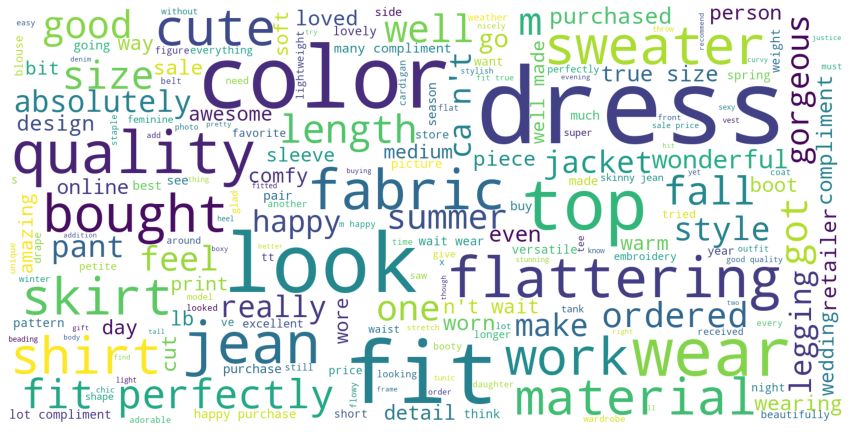

In [55]:
plt.figure(figsize=(15,15))
plt.imshow(good_wordcloud)
plt.axis("off")

In [57]:
bad_phrases = clean_dataset[ clean_dataset.review_polarity =='bad']
bad_phrases.head(3)

text_nopunc  \
1130  I have been dying to try a mara hoffman bathin...   
1312  I was so excited to get this dress i need it f...   
1321  I purchased this sweater in a small  nothing o...   

                                           no_stopwords  Emoji_count  \
1130  i dying try mara hoffman bathing suit went one...            0   
1312  i excited get dress need wedding thought hit j...            0   
1321  i purchased sweater small nothing web site sta...            0   

                                           text_noEmoji  \
1130  i dying try mara hoffman bathing suit went one...   
1312  i excited get dress need wedding thought hit j...   
1321  i purchased sweater small nothing web site sta...   

                                      Lemmitizes_output review_polarity  
1130  i dying try mara hoffman bathing suit went one...             bad  
1312  i excited get dress need wedding thought hit j...             bad  
1321  i purchased sweater small nothing web site sta...             bad

In [58]:
bad_words=[]
for t in bad_phrases.Lemmitizes_output:  # Go to the "text" column of "neg_phrases" dataframe
    bad_words.append(t)
bad_text = pd.Series(bad_words).str.cat(sep = ' ')

In [59]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
bad_stop_words = ["disappointed","small","bad","worst","thin","quality"] + list(STOPWORDS)

In [60]:
wordcloud_bad = WordCloud(stopwords = bad_stop_words,width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(bad_text)

(-0.5, 1599.5, 799.5, -0.5)

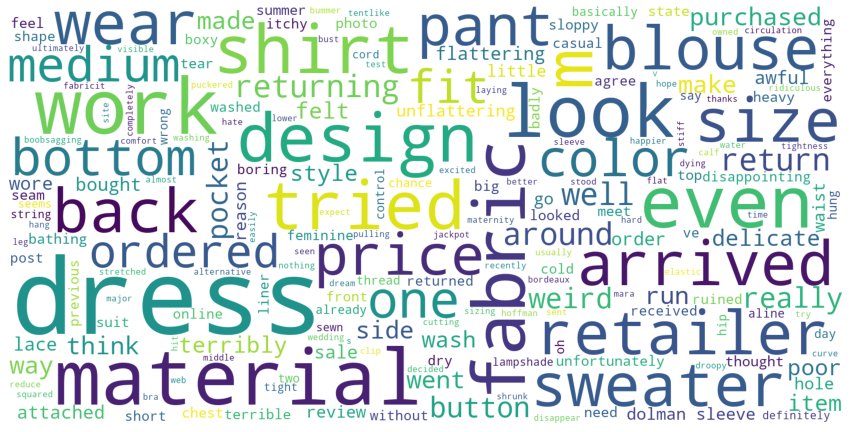

In [61]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_bad)
plt.axis("off")

In [62]:
neutral_phrases = clean_dataset[ clean_dataset.review_polarity =='neutral']
neutral_phrases.head(3)

text_nopunc  \
1  Love this dress  it's sooo pretty  i happened ...   
2  I had such high hopes for this dress and reall...   
3  I love love love this jumpsuit it's fun flirty...   

                                        no_stopwords  Emoji_count  \
1  love dress sooo pretty happened find store i'm...            0   
2  i high hopes dress really wanted work initiall...            0   
3  i love love love jumpsuit fun flirty fabulous ...            0   

                                        text_noEmoji  \
1  love dress sooo pretty happened find store i'm...   
2  i high hopes dress really wanted work initiall...   
3  i love love love jumpsuit fun flirty fabulous ...   

                                   Lemmitizes_output review_polarity  
1  love dress sooo pretty happened find store i '...         neutral  
2  i high hope dress really wanted work initially...         neutral  
3  i love love love jumpsuit fun flirty fabulous ...         neutral

In [63]:
neutral_words=[]
for t in neutral_phrases.Lemmitizes_output:  # Go to the "text" column of "neg_phrases" dataframe
    neutral_words.append(t)
neutral_text = pd.Series(neutral_words).str.cat(sep = ' ')

In [64]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
neutral_stop_words = ["disappointed","small","bad","worst","thin","quality","dress","perfect","fabric","top","color","love"] + list(STOPWORDS)

In [65]:
wordcloud_neutral = WordCloud(stopwords=neutral_stop_words, width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(neutral_text)

(-0.5, 1599.5, 799.5, -0.5)

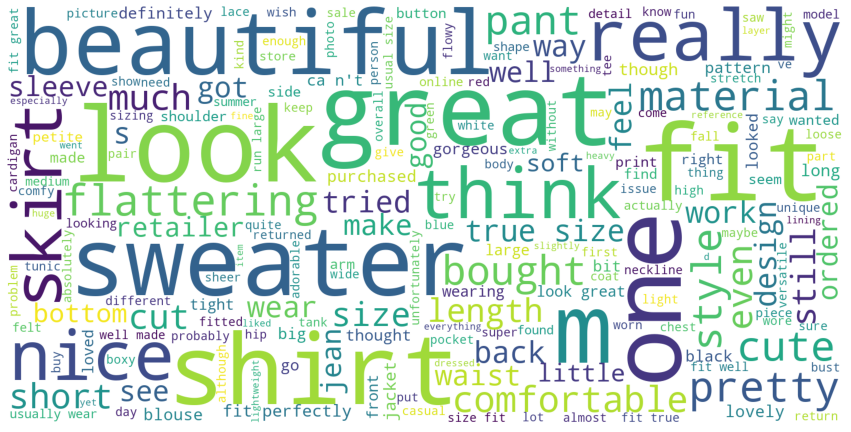

In [66]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neutral)
plt.axis("off")

In [216]:
#modelling 

In [67]:
from sklearn.feature_extraction import text

In [68]:
cv = text.CountVectorizer(input=clean_dataset['Lemmitizes_output'],ngram_range=(1,3))

In [69]:
# Create bi-gram 
#ngram_range tuple (min_n, max_n), (1,1)
# (1,1) = Umigram
# (1,2) = Unigram and bigram
# (2,2) = Bigram
#min_n< = n <= max_n
cv1 = text.CountVectorizer(input=lemmitization_output, ngram_range=(1,1))
matrix1 = cv1.fit_transform(lemmitization_output)
pd.DataFrame(matrix1.toarray(), columns=cv1.get_feature_names())

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  002first  00p  00p0p  00p0rxxsxs  02  025  02xs  03  ...  \
0       0    0         0    0      0           0   0    0     0   0  ...   
1       0    0         0    0      0           0   0    0     0   0  ...   
2       0    0         0    0      0           0   0    0     0   0  ...   
3       0    0         0    0      0           0   0    0     0   0  ...   
4       0    0         0    0      0           0   0    0     0   0  ...   
...    ..  ...       ...  ...    ...         ...  ..  ...   ...  ..  ...   
22636   0    0         0    0      0           0   0    0     0   0  ...   
22637   0    0         0    0      0           0   0    0     0   0  ...   
22638   0    0         0    0      0           0   0    0     0   0  ...   
22639   0    0         0    0      0           0   0    0     0   0  ...   
22640   0    0         0    0      0           0   0    0     0   0  ...   

       zipperone  zippie  zipping  zombie  zone  zoolander  zoom  zooming  \
0              0       0        0       0     0          0     0        0   
1              0       0        0       0     0          0     0        0   
2              0       0        0       0     0          0     0        0   
3              0       0        0       0     0          0     0        0   
4              0       0        0       0     0          0     0        0   
...          ...     ...      ...     ...   ...        ...   ...      ...   
22636          0       0        0       0     0          0     0        0   
22637          0       0        0       0     0          0     0        0   
22638          0       0        0       0     0          0     0        0   
22639          0       0        0       0     0          0     0        0   
22640          0       0        0       0     0          0     0        0   

       zuma  ã¼ber  
0         0      0  
1         0      0  
2         0      0  
3         0      0  
4         0      0  
...     ...    ...  
22636     0      0  
22637     0      0  
22638     0      0  
22639     0      0  
22640     0      0  

[22641 rows x 17791 columns]

In [70]:
cv1.vocabulary_

{'absolutely': 967,
 'wonderful': 17489,
 'silky': 13868,
 'sexy': 13494,
 'comfortable': 3749,
 'love': 9255,
 'dress': 5198,
 'sooo': 14427,
 'pretty': 11940,
 'happened': 7307,
 'find': 6187,
 'store': 14792,
 'glad': 6907,
 'bc': 2035,
 'never': 10314,
 'would': 17569,
 'ordered': 10847,
 'online': 10742,
 'petite': 11411,
 'bought': 2629,
 'length': 8880,
 'hit': 7580,
 'little': 9069,
 'knee': 8567,
 'definitely': 4634,
 'true': 16222,
 'midi': 9772,
 'someone': 14404,
 'truly': 16227,
 'high': 7487,
 'hope': 7649,
 'really': 12377,
 'wanted': 17011,
 'work': 17520,
 'initially': 8013,
 'small': 14188,
 'usual': 16722,
 'size': 13935,
 'found': 6584,
 'outrageously': 10927,
 'fact': 5944,
 'could': 4128,
 'zip': 17771,
 'reordered': 12647,
 'medium': 9623,
 'ok': 10678,
 'overall': 10950,
 'top': 15995,
 'half': 7244,
 'fit': 6224,
 'nicely': 10345,
 'bottom': 2605,
 'tight': 15839,
 'layer': 8774,
 'several': 13479,
 'somewhat': 14416,
 'cheap': 3299,
 'net': 10303,
 'imo': 7871

In [83]:
message4 = lemmitization_output[2]
print(message4)

i high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c


In [84]:
bow4 = cv1.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 2605)	1
  (0, 3299)	1
  (0, 3749)	1
  (0, 4128)	1
  (0, 4741)	1
  (0, 4899)	1
  (0, 5198)	1
  (0, 5944)	1
  (0, 6224)	1
  (0, 6361)	1
  (0, 6584)	1
  (0, 7244)	2
  (0, 7487)	1
  (0, 7649)	1
  (0, 7871)	1
  (0, 8013)	1
  (0, 8774)	3
  (0, 9413)	1
  (0, 9623)	1
  (0, 10303)	2
  (0, 10345)	1
  (0, 10678)	1
  (0, 10847)	1
  (0, 10927)	1
  (0, 10950)	1
  (0, 11411)	2
  (0, 12377)	1
  (0, 12647)	1
  (0, 13479)	1
  (0, 13487)	1
  (0, 13935)	1
  (0, 14188)	3
  (0, 14416)	1
  (0, 15839)	1
  (0, 15995)	1
  (0, 16722)	1
  (0, 17011)	1
  (0, 17520)	1
  (0, 17771)	1
  (0, 17778)	1
(1, 17791)


In [85]:
print(cv1.get_feature_names()[14188])

small


C:\Users\shubh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
messages_bow = cv1.transform(lemmitization_output)

In [87]:
print('Shape of Sparse Matrix: ', matrix1.shape)
print('Amount of Non-Zero occurences: ', matrix1.nnz)

Shape of Sparse Matrix:  (22641, 17791)
Amount of Non-Zero occurences:  594812


In [88]:
# What makes a word important 
# 1 - IF the word ocuurs a lot in the document 
# 2 - If the word ocurrs rarely in the corpus 

# TF-IDF

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [90]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 17778)	0.1242545930772128
  (0, 17771)	0.14155547339765903
  (0, 17520)	0.07822787881639955
  (0, 17011)	0.09769909597088615
  (0, 16722)	0.10161220261512069
  (0, 15995)	0.05668069569024615
  (0, 15839)	0.09118079559031703
  (0, 14416)	0.13761269589087063
  (0, 14188)	0.20148989029261044
  (0, 13935)	0.05235495591578721
  (0, 13487)	0.14454499313148705
  (0, 13479)	0.1266597874341889
  (0, 12647)	0.1772144482151022
  (0, 12377)	0.06907693330695244
  (0, 11411)	0.16526908409902463
  (0, 10950)	0.10338918246473429
  (0, 10927)	0.2363706574145314
  (0, 10847)	0.0685546172727433
  (0, 10678)	0.13444948666890694
  (0, 10345)	0.10439201730078965
  (0, 10303)	0.4484196708216246
  (0, 9623)	0.0831248906153218
  (0, 9413)	0.17592731259873243
  (0, 8774)	0.35669860616928334
  (0, 8013)	0.15593603227756042
  (0, 7871)	0.17592731259873243
  (0, 7649)	0.1260353264540053
  (0, 7487)	0.09877756869553754
  (0, 7244)	0.27497545724597955
  (0, 6584)	0.10066470138362349
  (0, 6361)	0.1464644815099

In [91]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(22641, 17791)


# Training a model

In [92]:
from sklearn.naive_bayes import MultinomialNB
rating_detect_model = MultinomialNB().fit(messages_tfidf, clean_dataset['review_polarity'])

In [93]:
print('predicted:', rating_detect_model.predict(tfidf4)[0])
print('expected:', clean_dataset.review_polarity[3])

predicted: neutral
expected: neutral


# Model Evaluation

In [94]:
all_predictions = rating_detect_model.predict(messages_tfidf)
print(all_predictions)

['neutral' 'neutral' 'neutral' ... 'neutral' 'neutral' 'neutral']


In [95]:
from sklearn.metrics import classification_report
print (classification_report(clean_dataset['review_polarity'], all_predictions))

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        60
        good       0.00      0.00      0.00       743
     neutral       0.96      1.00      0.98     21838

    accuracy                           0.96     22641
   macro avg       0.32      0.33      0.33     22641
weighted avg       0.93      0.96      0.95     22641



C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
df.columns

Index(['Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name', 'Polarity', 'review_len', 'token_count'],
      dtype='object')

# Train Test Split

In [97]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(lemmitization_output, df['Rating'], test_size=0.2)

print(len(msg_train), len(msg_test), len(label_train) , len(label_test))

18112 4529 18112 4529


# Creating a Data Pipeline

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
from sklearn.ensemble import StackingClassifier

In [101]:
from sklearn.svm import SVC

In [106]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',RandomForestClassifier())  # train on TF-IDF vectors w/ Naive Bayes classifier

     ])

In [107]:
pipeline.fit(X= msg_train,y=label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [104]:
predictions = pipeline.predict(msg_test)

NotFittedError: Vocabulary not fitted or provided

In [151]:
predictions.shape

(4529,)

In [152]:
label_test.shape

(4529,)

In [159]:
new =pd.DataFrame(label_test)

In [166]:
new.isnull().sum()

Rating        0
prediction    0
dtype: int64

In [138]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           1       0.01      1.00      0.02         2
           2       0.01      0.14      0.02        29
           3       0.11      0.38      0.16       159
           4       0.06      0.32      0.09       171
           5       0.99      0.59      0.74      4168

    accuracy                           0.57      4529
   macro avg       0.23      0.49      0.21      4529
weighted avg       0.92      0.57      0.69      4529

